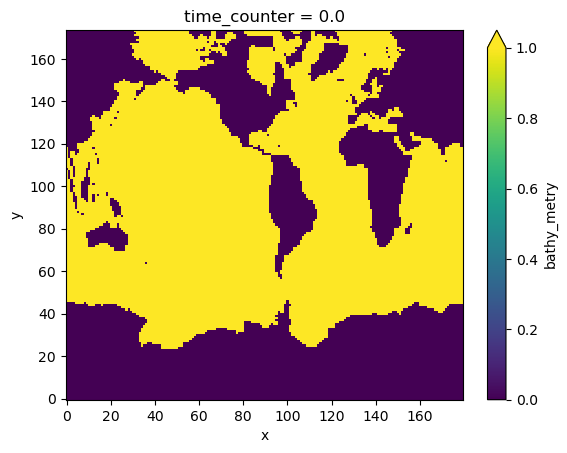

In [84]:
import xarray as xr
datadir="/home/ccpd/hpcperm/EPOCHAL/"
file=f'{datadir}/PALEORCA_bathy_metry_from_eORCA1_dis.nc'
xfield = xr.open_dataset(file)
def close_region(xfield, region):
    if region == 'Caspian':
        xfield['bathy_metry'][:, 129:140,  154:159] = 0
    if region == 'Victoria':
        xfield['bathy_metry'][:,  95:102,  148] = 0
    if region == "GreatLakes":
        xfield['bathy_metry'][:,  132:141,  86:94] = 0
    if region == "Arctic":
        xfield['bathy_metry'][:,  173,  117] = 0
        xfield['bathy_metry'][:,  173,  63:65] = 0
    if region == "Britain":
        xfield['bathy_metry'][:,  140:142,  130] = 0
    if region == "Panama":
        xfield['bathy_metry'][:,  119:120,  84] = 0
        xfield['bathy_metry'][:,  115,  89:93] = 0
        xfield['bathy_metry'][:,  114,  93] = 0
    if region == "Thailand":
        xfield['bathy_metry'][:,  105:108, 1] = 0
        xfield['bathy_metry'][:,  103, 2] = 0
        xfield['bathy_metry'][:,  114:116, 1] = 0
        xfield['bathy_metry'][:,  110:114, 2] = 0
        xfield['bathy_metry'][:,  107:110, 3] = 0
    if region == "Italy":
        xfield['bathy_metry'][:,  133:134,  138] = 0
        xfield['bathy_metry'][:,  132,  139] = 0
    if region == "Kamchatka":
        xfield['bathy_metry'][:,  146:149,  35] = 0
        xfield['bathy_metry'][:,  148,  36] = 0
    return xfield

xfield = close_region(xfield, 'Caspian')
xfield = close_region(xfield, 'Victoria')
xfield = close_region(xfield, 'GreatLakes')
xfield = close_region(xfield, 'Arctic')
xfield = close_region(xfield, 'Britain')
xfield = close_region(xfield, 'Panama')
xfield = close_region(xfield, 'Thailand')
xfield = close_region(xfield, 'Italy')
xfield = close_region(xfield, 'Kamchatka')
xfield['bathy_metry'] = xr.where((xfield['bathy_metry']>3.5) & (xfield['bathy_metry']<5.5), 5.5, xfield['bathy_metry'])
xfield['bathy_metry'] = xr.where(xfield['bathy_metry']<=3.5, 0, xfield['bathy_metry'])
xfield['bathy_metry'].plot(vmin=0, vmax=1)
xfield.to_netcdf(f'{datadir}/PALEORCA_bathy_metry_from_eORCA1_dis_closed.nc')

In [52]:
xfield

<xarray.Dataset> Size: 3MB
Dimensions:       (time_counter: 1, y: 174, x: 180, bnds: 4)
Coordinates:
  * time_counter  (time_counter) float32 4B 0.0
    lon           (y, x) float64 251kB ...
    lat           (y, x) float64 251kB ...
Dimensions without coordinates: y, x, bnds
Data variables:
    lon_bnds      (y, x, bnds) float64 1MB ...
    lat_bnds      (y, x, bnds) float64 1MB ...
    nav_lon       (y, x) float32 125kB ...
    nav_lat       (y, x) float32 125kB ...
    bathy_metry   (time_counter, y, x) float64 251kB ...
Attributes: (12/14)
    CDI:                     Climate Data Interface version 2.5.1 (https://mp...
    Conventions:             CF-1.6
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [360 331]
    ...                      ...
    DOMAIN_position_last:    [360 331]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    history:                 Fri Sep 19 08:57:51 2025: cdo remapdis,/lus/h2re...
    CDO:                     Climate Data Operators version 2.5.1 (https://mp...